Input the file name of your .wav file 0w0 
  **(No need to type .wav)**
File name (.wav): Recording-3

  Signals from the sound:


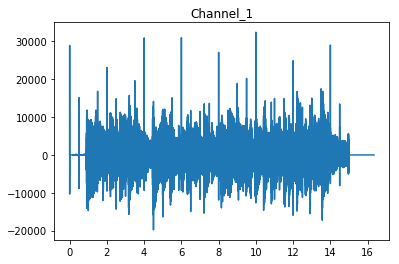

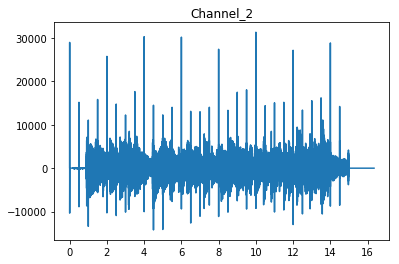

  Writing the sound data into the text files...
  Done!


In [3]:
#1 [importing the wav. file, viewing the sound waves and transforming the data into txt. files]

import wave
import numpy as np
import matplotlib.pyplot as plt


def read_wav_data(filename):
    wav = wave.open(filename, "rb") #打開一個wav格式的音效檔流
    num_frame = wav.getnframes() #獲取幀數
    num_channel = wav.getnchannels() #獲取聲道數
    framerate = wav.getframerate() #獲取畫面播放速率
    num_sample_width=wav.getsampwidth() #獲取實例的比特寬度，即每一幀的位元組數
    str_data = wav.readframes(num_frame) #讀取全部的幀
    wav.close() #關閉流
    wave_data = np.fromstring(str_data, dtype = np.short) #將音效檔資料轉換為陣列矩陣形式
    wave_data.shape = -1, num_channel #按照聲道數將陣列整形，單聲道時候是一列陣列，雙聲道時候是兩列的矩陣
    wave_data = wave_data.T #將矩陣轉置
    wave_data = wave_data 
    return wave_data, framerate


def wav_show(wave_data, fs, title): #顯示出來聲音波形
    time = np.arange(0, len(wave_data)) * (1.0/fs)  #計算聲音的播放時間，單位為秒
    #畫聲音波形
    plt.plot(time, wave_data)  
    plt.title(title)
    plt.show()

print("Input the file name of your .wav file 0w0 \n  **(No need to type .wav)**")
a = input("File name (.wav): ") + '.wav' 


f1 = open("sound1.txt", "w")
f2 = open("sound2.txt", "w")
f3 = open("time.txt", "w")

if(__name__=='__main__'):
    print ("\n  Signals from the sound:")
    wave_data, fs = read_wav_data(a)  
    wav_show(wave_data[0], fs, 'Channel_1')
    wav_show(wave_data[1], fs, 'Channel_2')  #如果是雙聲道則保留這一行，否則刪掉這一行
    length = len(wave_data[0])  #這裡重要
    time = np.arange(0, length) * (1.0/fs)
    print("  Writing the sound data into the text files...")  
    for i in range(length):
        f1.write(str(wave_data[0][i]) + "\n")
        f2.write(str(wave_data[1][i]) + "\n")
        f3.write(str(time[i]) + "\n")

f1.close()
f2.close()
f3.close()

print("  Done!")

In [4]:
#2 [transforming the text files into list variables]


g1 = open("sound1.txt", "r")
g2 = open("sound2.txt", "r")
g3 = open("time.txt", "r")

sound1 = []
sound2 = []
t = []

print('  Reading the txt. files and creating the list variables...')

for i in range(length):
    sound1.append(float(g1.readline()))
    sound2.append(float(g2.readline()))
    t.append(float(g3.readline()))
    
print('  Done!')

g1.close()
g2.close()
g3.close()

  Reading the txt. files and creating the list variables...
  Done!


Use the default parameters to generate the chaos (y/n)? y
Calculating and generating...
Integration successful.

  Signals from the chaos:


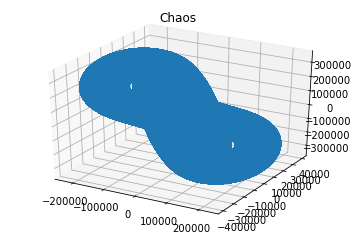

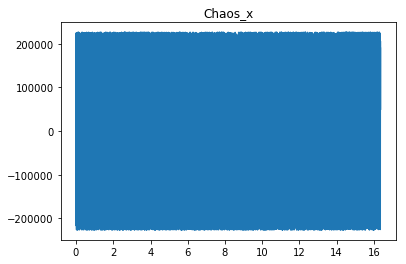

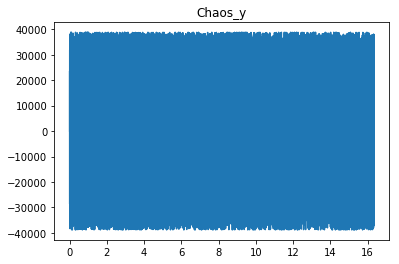

In [8]:
#3 [generating the chaos]

import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#the parameters of generating the chaos
ans = input('Use the default parameters to generate the chaos (y/n)? ')
if ans == 'y':
    c0 = 15.6 * 600
    c1 = 1.0 * 600
    c2 = 28.0 * 600
    m0 = -1.143
    m1 = -0.714
if ans == 'n':
    print('Enter the values of the following parameters: ')
    c0 = float(input('c0 = '))
    c1 = float(input('c1 = '))
    c2 = float(input('c2 = '))
    m0 = float(input('m0 = '))
    m1 = float(input('m1 = '))


#chaos-generating functions calculating
def f(x):
    f = m1*x + (m0-m1)/2.0*(abs(x+1.0)-abs(x-1.0))
    return f

def dH_dt(H, t=0):
    return np.array([c0 * (H[1]-H[0]-f(H[0])),
                  c1 * (H[0]-H[1]+H[2]),
                  -c2 * H[1]])
    

#the initial conditions of x, y, and z
H0 = [0.7, 0.0, 0.0]


print('Calculating and generating...')

H, infodict = integrate.odeint(dH_dt, H0, t, full_output = True)  #這裡的t用到了聲音檔的t

print(infodict['message'])

print ("\n  Signals from the chaos:")

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection = '3d')
ax.plot(H[:,0]*1e05, H[:,1]*1e05, H[:,2]*1e05)
plt.title("Chaos")
plt.show()

plt.plot(t, H[:,0]*1e05)
plt.title("Chaos_x")
plt.show()

plt.plot(t, H[:,1]*1e05)
plt.title("Chaos_y")
plt.show()


  Signals from the mixture:


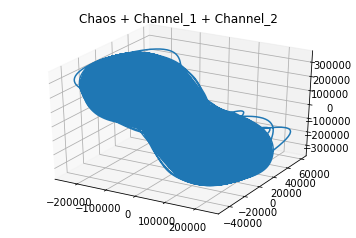

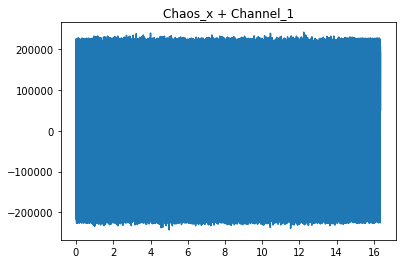

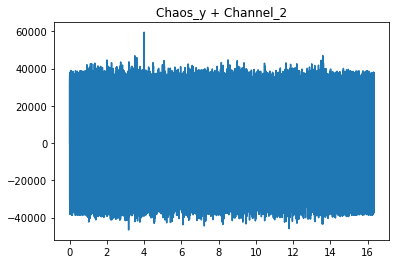

In [9]:
#4 [adding sound data to the chaos]

    
out1 = H[:,0]*1e05 + sound1
out2 = H[:,1]*1e05 + sound2
out3 = H[:,2]*1e05

print ("\n  Signals from the mixture:")

fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')
ax.plot(out1, out2, out3)
plt.title("Chaos + Channel_1 + Channel_2")
plt.show()

plt.plot(t, out1)
plt.title("Chaos_x + Channel_1")
plt.show()

plt.plot(t, out2)
plt.title("Chaos_y + Channel_2")
plt.show() 

In [10]:
#5 [transforming the results into txt. files]


f4= open("in1.txt", "w")
f5= open("in2.txt", "w")

print("  Writing the data into the text files...")

for i in range(length):
    f4.write(str(out1[i]) + "\n")
    f5.write(str(out2[i]) + "\n")
    
print('  Done!')

f4.close()
f5.close()


  Writing the data into the text files...
  Done!


In [18]:
#6 [transforming the results into .wav]


framerate = 44100
time = length / framerate

out1_array = np.array([0.0] * length)
out2_array = np.array([0.0] * length)


for l in range(length):
    out1_array[l] = out1[l]
    out2_array[l] = out2[l]


wave_data1 = out1_array
wave_data1 = wave_data1.astype(np.short)

h1 = wave.open(r"mix1.wav", "wb")  # 打開.wav檔
h1.setnchannels(1)  #配置聲道數、量化位元數和取樣頻率
h1.setsampwidth(2)
h1.setframerate(framerate)
h1.writeframes(wave_data1.tostring())  #將wav_data轉換為二進位資料寫入檔

print("  File 'mix1.wav' created.")

h1.close()


wave_data2 = out2_array
wave_data2 = wave_data2.astype(np.short)

h2 = wave.open(r"mix2.wav", "wb")
h2.setnchannels(1)
h2.setsampwidth(2)
h2.setframerate(framerate)
h2.writeframes(wave_data2.tostring())

print("  File 'mix2.wav' created.")

h2.close()


  File 'mix1.wav' created.
  File 'mix2.wav' created.
